# **Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

importing dataset


In [3]:
df = pd.read_csv("/content/sgemm_product.csv")

df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


#Data summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [5]:
#checking dublicates
df.duplicated(keep=False).sum()

0

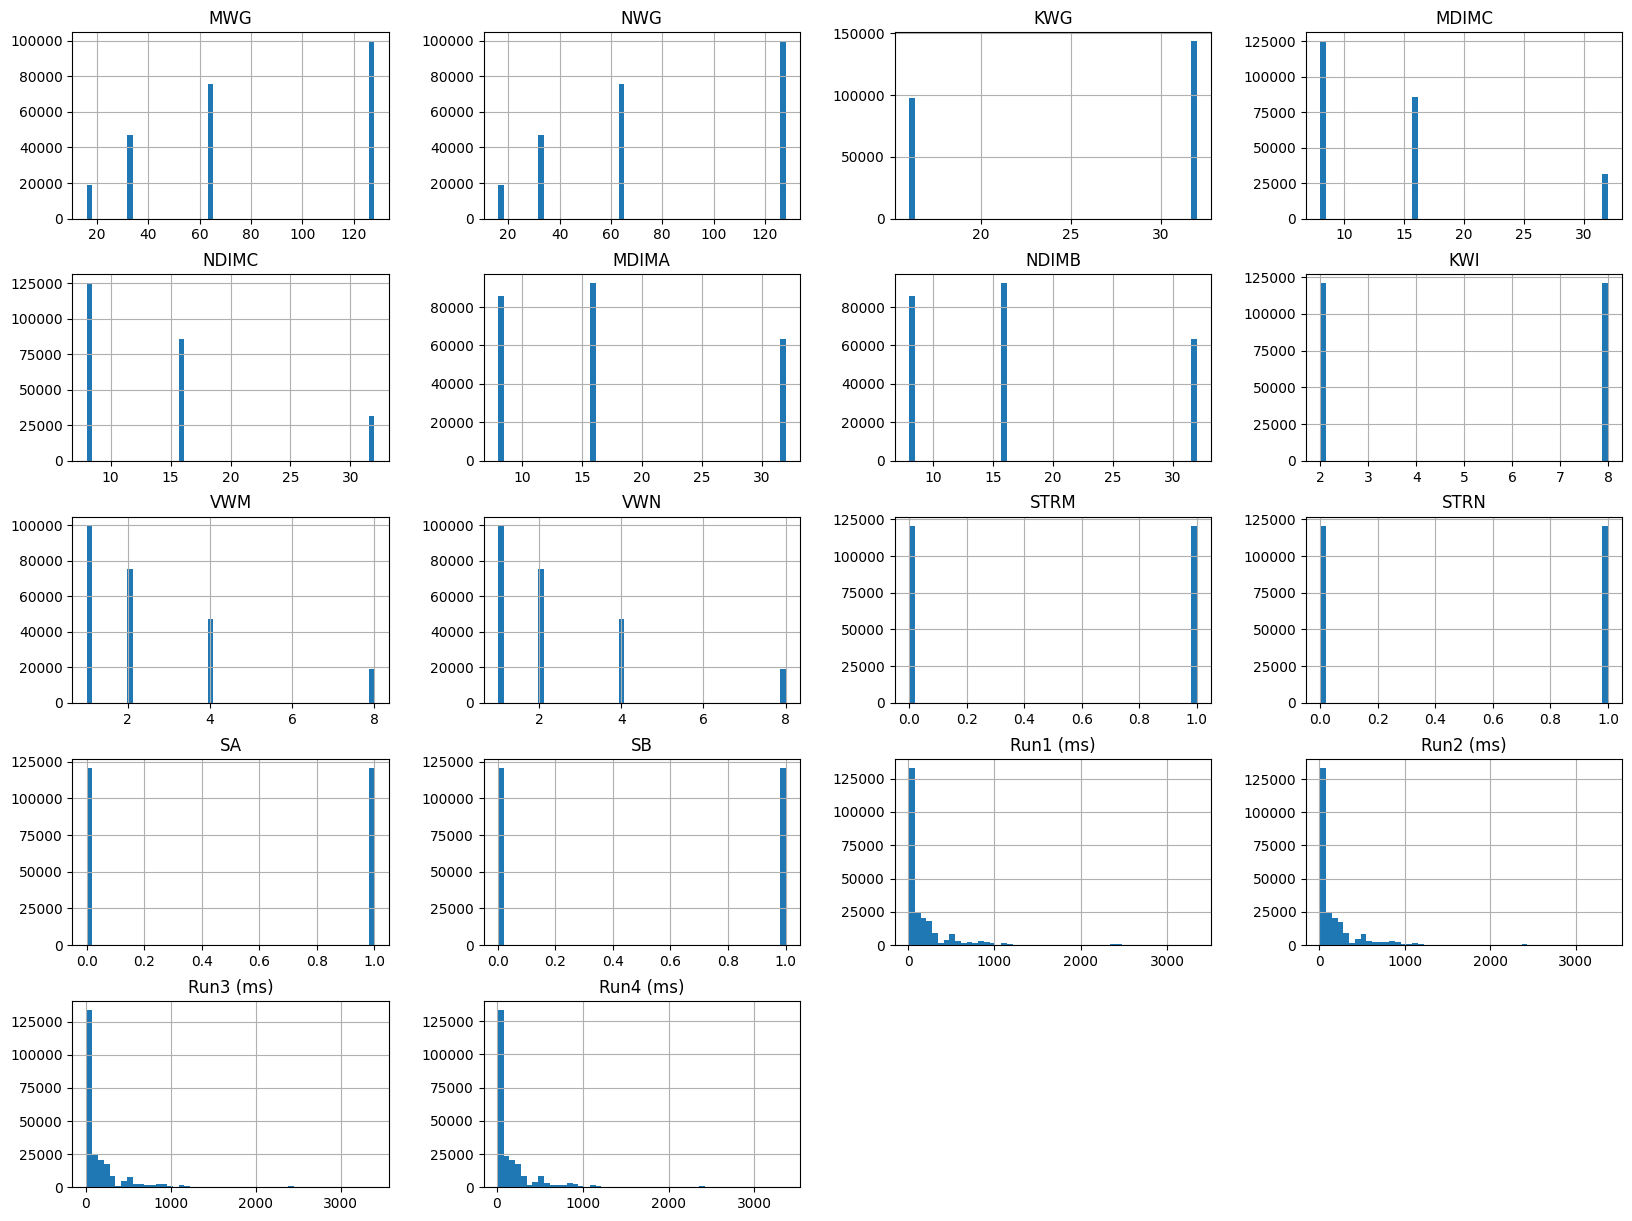

In [6]:
 #visual representation of the data
 df.hist(bins=50, figsize=(20,15))
 plt.show()

#Feature engineering

In [7]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [8]:
#list the columns to calculate the mes
columns = ['Run1 (ms)',  'Run2 (ms)' , 'Run3 (ms)' , 'Run4 (ms)']

In [9]:
#calculate the mean
df['target']=df[columns].mean(axis=1)

#display
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),target
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [10]:
# drop the columns
df = df.drop(columns={'Run1 (ms)','Run2 (ms)' , 'Run3 (ms)' , 'Run4 (ms)'})

#display
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,target
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


# correlation **analysis**

In [11]:
print(df.columns)

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'target'],
      dtype='object')


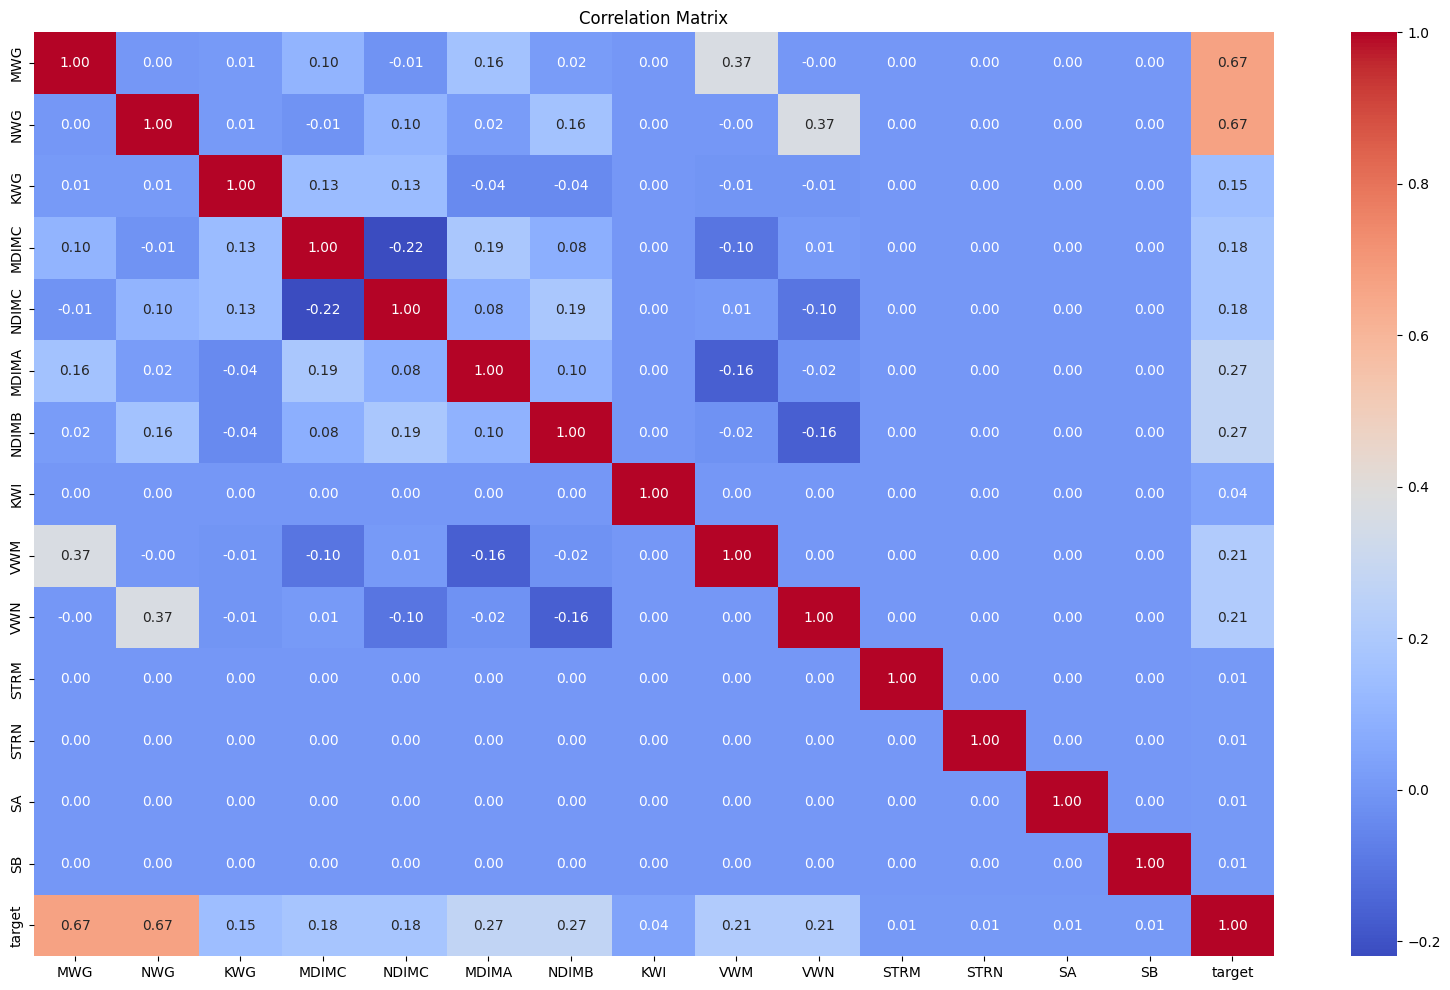

In [12]:
#calculate the mean
df['target']=df[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB']].mean(axis=1) # Add this line to calculate the target column

corr_matrix = df[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'target']].corr(method='spearman')

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

when the corelation is said to be colese to zero it generally means that the relation between two variables is week.it is suggested that changes in one variable are not well-predicted by changes in the other variable based on linear pattern.

# define the ***features***

In [13]:
#define the dependent variables/features
x = df.drop(columns=['target'])
#target variable
y = df['target']

# **spliting the data to training set and testing set**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# #scaling data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
#initilize the scaler
scaler = StandardScaler()
 #fit and transform the traing data
x_train_scaled = scaler.fit_transform(x_train)
 #transform the testing data
x_test_scaled = scaler.transform(x_test)

# linear algorithms- decision trees,extra trees,random forest,lightgbm,catboost

In [18]:
!pip install catboost

In [19]:
#importing models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression

#models for evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [20]:
#create instance of models
models = {
'Decision Tree': DecisionTreeRegressor(),
'Extra Trees': ExtraTreesRegressor(),
'Random Forest': RandomForestRegressor(),
'LightGBM': LGBMRegressor(),
'CatBoost': CatBoostRegressor(verbose=0),
'Linear Regression': LinearRegression()
}

# Initialize a dictionary that will store results
result = {'Models': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R2 Score': []}

# Loop over the models
for model_name, model in models.items():
    # Fit the model to training data
    model.fit(x_train_scaled, y_train)

    # Making prediction on testing data
    y_pred = model.predict(x_test_scaled)

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Compute RMSE
    r2 = r2_score(y_test, y_pred)

    # Store the results in the dictionary
    result['Models'].append(model_name)
    result['MAE'].append(mae)
    result['MSE'].append(mse)
    result['RMSE'].append(rmse)
    result['R2 Score'].append(r2)

# Create a DataFrame with the results
result_df = pd.DataFrame(result)

# Display the output
result_df.head(10)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 193280, number of used features: 14
[LightGBM] [Info] Start training from score 18.622730


,Models,MAE,MSE,RMSE,R2 Score
0,Decision Tree,7.093927e-02,5.103202e-03,7.143670e-02,0.999782
1,Extra Trees,6.049836e-02,4.081114e-03,6.388359e-02,0.999826
2,Random Forest,3.586082e-02,1.797167e-03,4.239301e-02,0.999923
3,LightGBM,5.582907e-02,5.096910e-03,7.139265e-02,0.999782
4,CatBoost,6.637297e-04,7.290885e-07,8.538668e-04,1.000000
5,Linear Regression,3.981933e-15,2.666325e-29,5.163647e-15,1.000000


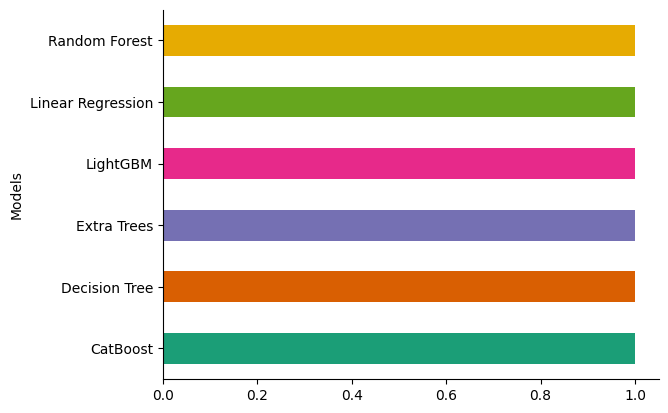

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

# Use result_df instead of _df_3
result_df.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# scatter plots

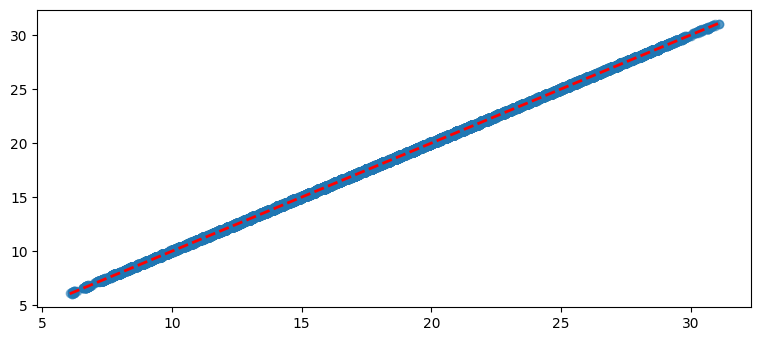

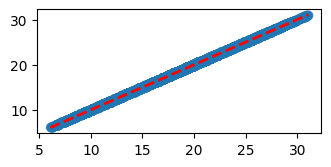

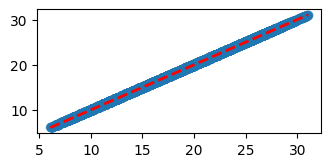

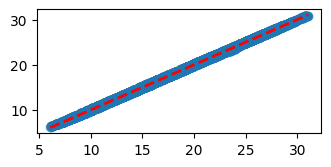

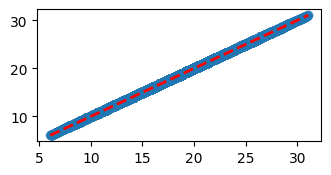

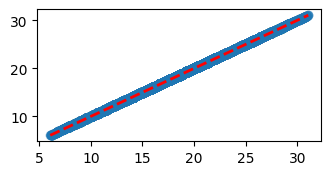

In [23]:
#define the grid layout
rows, cols =3, 2

#specify the figure size
plt.figure(figsize=(15, 10))

#looping over the results
for idx, (model_name, model) in enumerate(models.items(), 1):

  #make predictions on the testing data
  y_pred = model.predict(x_test_scaled)

  #scatter plots
  plt.subplot(rows, cols, idx)
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red',linewidth=2)

  #adjust the layout
  plt.tight_layout()

  plt.show()

In [24]:
import pandas as pd
import plotly.express as px

# Sample DataFrame creation
result_df = pd.DataFrame({
    'Models': ['Model A', 'Model B', 'Model C'],
    'MAE': [0.1, 0.2, 0.15],
    'MSE': [0.02, 0.04, 0.03],
    'RMSE': [0.14, 0.2, 0.17],
    'R2': [0.9, 0.8, 0.85]
})

# Convert the DataFrame to a long format
df_long = result_df.melt(id_vars='Models', var_name='Metric', value_name='Value')


In [25]:
fig = px.bar(df_long, x='Models', y='Value', color='Metric', title='Model Evaluation Metrics', barmode='group')

# Customize the layout
fig.update_xaxes(title_text='Models', tickangle=45)
fig.update_yaxes(title_text='Value')
fig.update_layout(title_text='Model Evaluation Metrics')

# Show the plot
fig.show()




*   for MAE and RMSE ,lower values are better,indicating smaller errors.
* for R2,higher values(closer to 1)better,indicating a better fit of the models to the data.
* when evaluating a model,its often available to consider multiple matrices to get a comprehensive understanding of its performance,especially since each matrice provides a different perspective on the models accuracy and goodness of fit.
* to determine which algorithm is the best,you typically look at different evaluatation metrices.the choice of the best algorithm can depend on the specific goals of our tasks and the importance of different metrices.
**bold text**




<Figure size 1000x600 with 0 Axes>

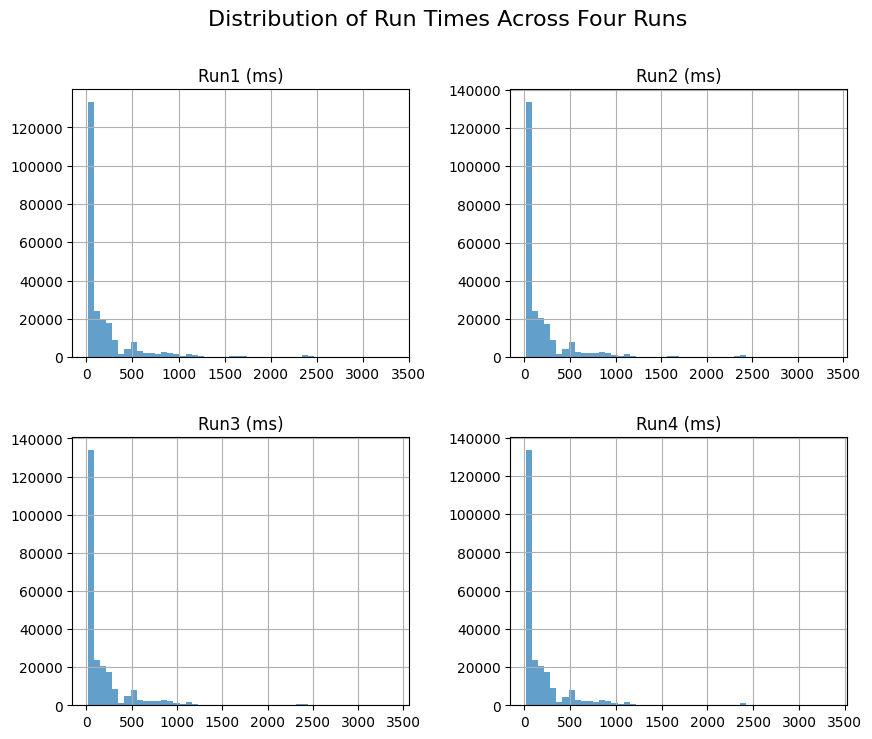

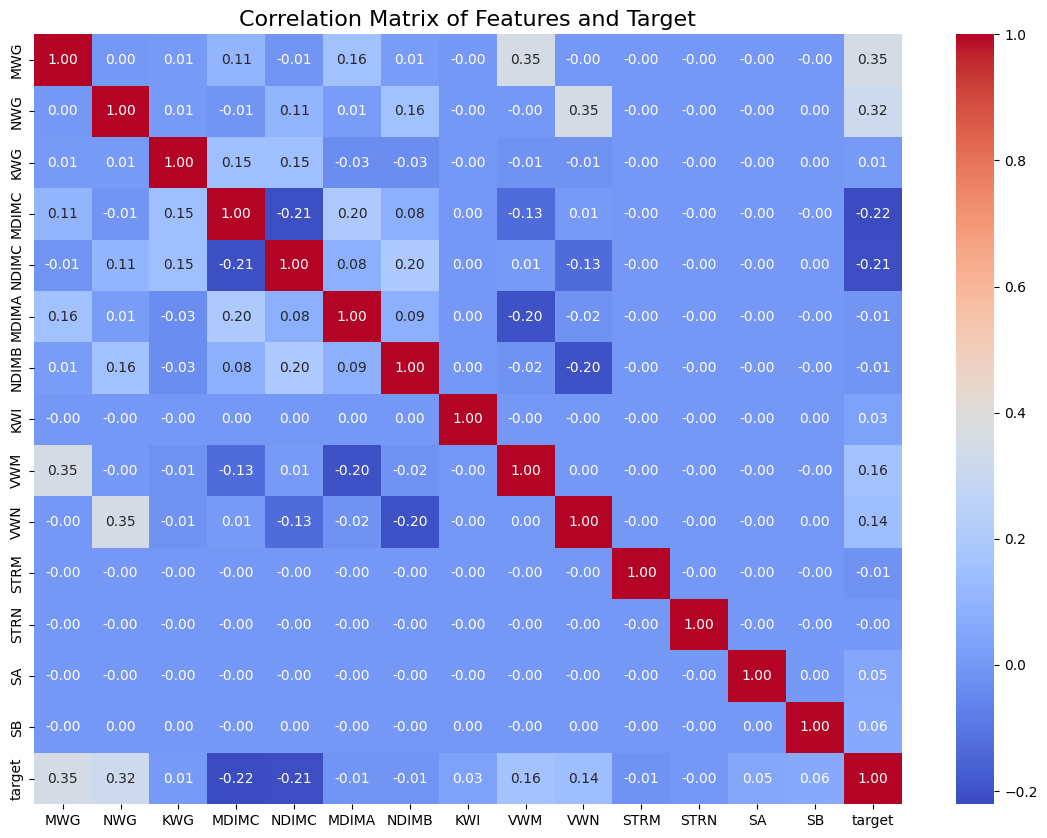

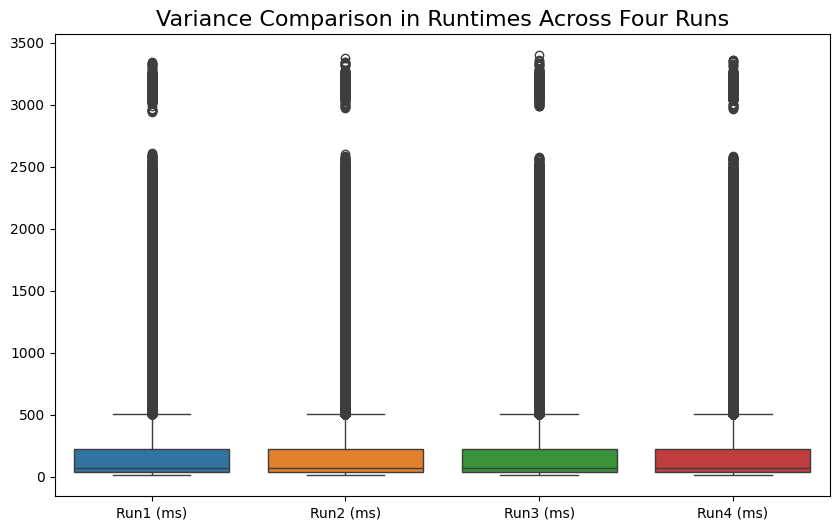

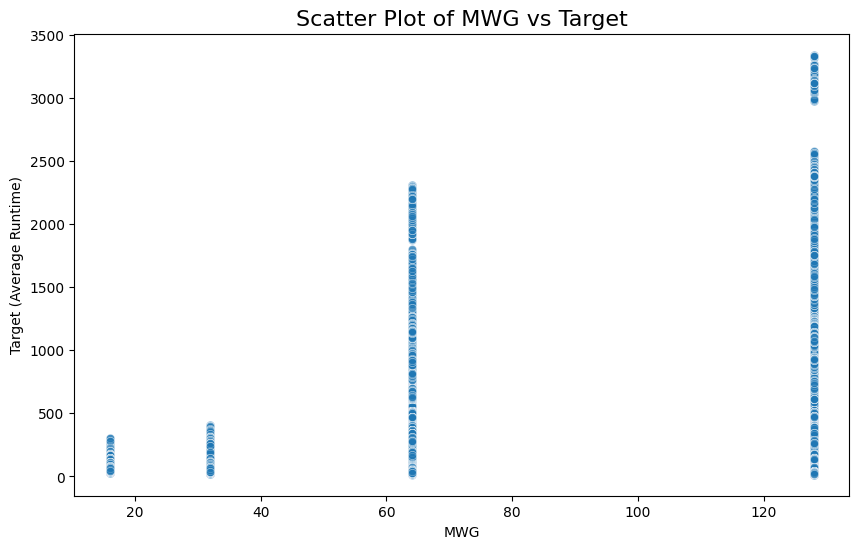

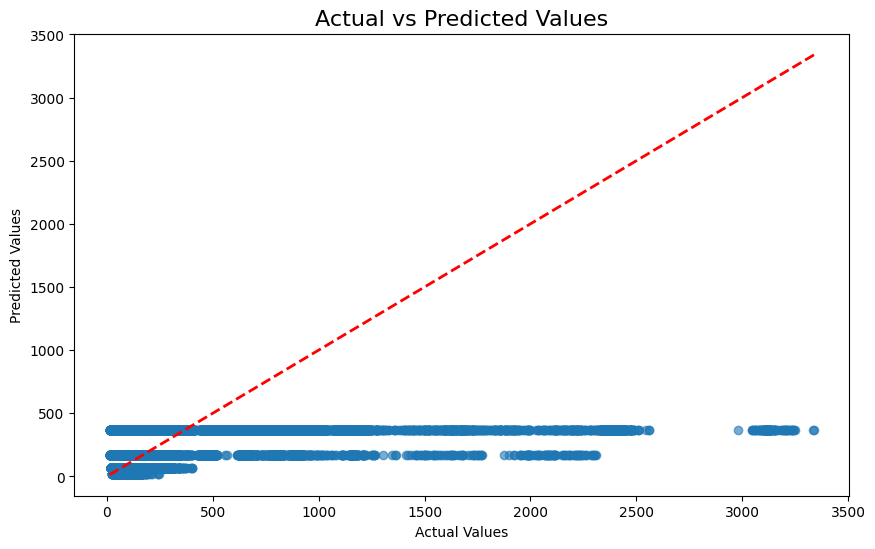

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Import pandas

# Load your data into a Pandas DataFrame (replace 'your_data.csv' with your actual file)
data = pd.read_csv('/content/sgemm_product.csv')

# Calculate the average runtime and add it as a new column named 'target'
data['target'] = data[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)

# Plot 1: Histogram for the distribution of runtimes (Run1, Run2, Run3, Run4)
plt.figure(figsize=(10, 6))
data[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].hist(bins=50, figsize=(10, 8), alpha=0.7)
plt.suptitle('Distribution of Run Times Across Four Runs', fontsize=16)
plt.show()

# Plot 2: Correlation matrix for features and target
if 'target' in data.columns:
  correlation_matrix = data[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB', 'target']].corr()

  plt.figure(figsize=(14, 10))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix of Features and Target', fontsize=16)
  plt.show()
else:
  print("Target column not found in the DataFrame.")

# Plot 3: Boxplot for variance comparison of runtimes
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']])
plt.title('Variance Comparison in Runtimes Across Four Runs', fontsize=16)
plt.show()

# Plot 4: Scatter plot of MWG vs. target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['MWG'], y=data['target'], alpha=0.6)
plt.title('Scatter Plot of MWG vs Target', fontsize=16)
plt.xlabel('MWG')
plt.ylabel('Target (Average Runtime)')
plt.show()

# Plot 5: Actual vs. Predicted Plot (using linear model from earlier example)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the features (just MWG for simplicity here) and target
X = data[['MWG']]
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()